In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
library(stringr)
library(DBI)
library(dbplyr)
library(GGally)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Predicting the Categorical Knowledge Level of a User from their Exam Performance on Electrical DC Machines

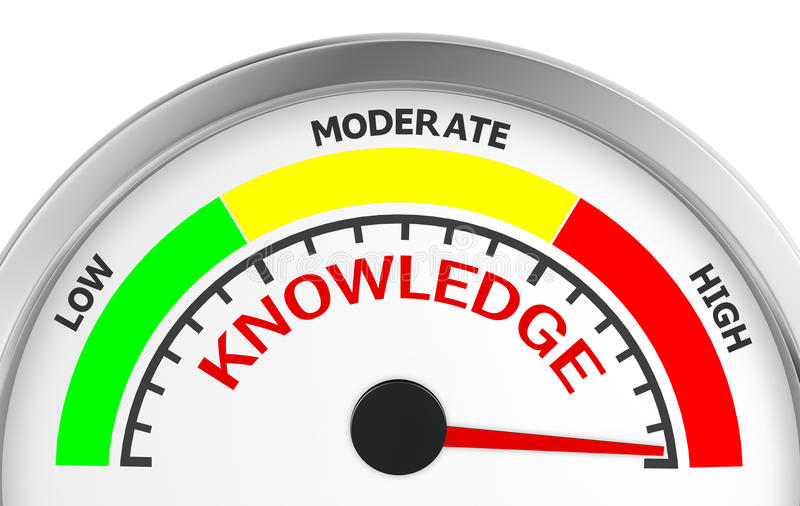

Source: https://www.dreamstime.com/stock-illustration-knowledge-level-to-maximum-conceptual-meter-d-rendering-image79954474

## Introduction

#### Background
Regular studying, repetition, and testing can help students learn about an Electrical DC Machine effectively. Students, otherwise known as users, can employ various techniques to improve their knowledge level about Electrical DC Machines. These techniques include how much time they spend studying and repeating the goal-oriented materials, as well as their exam performance on these materials. These techniques can also include the review of related materials to Electrical DC Machines. 

#### Our Question
In our study, we ask, "what will the user's knowledge be based on their examination performance on goal-oriented and related materials?"

#### Our Dataset
For this project, we are using the UCI Machine Learning Repository's User Knowledge Modelling Data Set. 
This data set contains 6 columns, 5 of which are input variables and 1 of which is the target variable (the level of user knowledge). Two of the columns list the users' study time, two other columns list the users' exam performance and the last two describe the degree of repetition used and the users' knowledge level. Each row in this dataset contains the values for each of the 6 variables mentioned.

**First, we download the url from the website using the *download.file* function and then loads the excel file into Jupyter by using the *read_excel* function. Second, we transforms the raw data into a tidy dataset by mutating the variables into human-readable ones. And third, we uses *as.factor* to make sure the classes in "user_knowledge" are having the unified names in both data sets.**

In [2]:
#Read training data set into R

library(readxl)
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
training_data <- read_excel("data.xls", sheet = 2) #'sheet = 2' is for training data

training_data_tidy <- select(training_data, STG:UNS) %>%
rename("goal_study_time" = STG, "goal_repetition_number_of_user" = SCG, "related_study_time" = STR, "related_exam_performance" = LPR, "goal_exam_performance" = PEG, "user_knowledge" = UNS) %>%
mutate(user_knowledge = as.factor(user_knowledge)) #Changes to the correct column type

levels(training_data_tidy $ user_knowledge) <- c('High', 'Low', 'Middle', 'Very Low') #Unifies the names of levels of user_knowledge in both data sets  

training_data_tidy

New names:
* `` -> ...7
* `` -> ...8



goal_study_time,goal_repetition_number_of_user,related_study_time,related_exam_performance,goal_exam_performance,user_knowledge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.00,0.00,0.00,0.00,Very Low
0.08,0.08,0.10,0.24,0.90,High
0.06,0.06,0.05,0.25,0.33,Low
⋮,⋮,⋮,⋮,⋮,⋮
0.54,0.82,0.71,0.29,0.77,High
0.50,0.75,0.81,0.61,0.26,Middle
0.66,0.90,0.76,0.87,0.74,High


*Table 1: Training data table*

In [3]:
#Read testing data set into R

url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/00257/Data_User_Modeling_Dataset_Hamdi%20Tolga%20KAHRAMAN.xls"

download.file(url, "data.xls")
testing_data <- read_excel("data.xls", sheet = 3) #'sheet = 3' is for testing data

testing_data_tidy <- select(testing_data, STG:UNS) %>%
rename("goal_study_time" = STG, "goal_repetition_number_of_user" = SCG, "related_study_time" = STR, "related_exam_performance" = LPR, "goal_exam_performance" = PEG, "user_knowledge" = UNS) %>%
mutate(user_knowledge = as.factor(user_knowledge))

testing_data_tidy

New names:
* `` -> ...7
* `` -> ...8



goal_study_time,goal_repetition_number_of_user,related_study_time,related_exam_performance,goal_exam_performance,user_knowledge
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.00,0.10,0.50,0.26,0.05,Very Low
0.05,0.05,0.55,0.60,0.14,Low
0.08,0.18,0.63,0.60,0.85,High
⋮,⋮,⋮,⋮,⋮,⋮
0.56,0.60,0.77,0.13,0.32,Low
0.66,0.68,0.81,0.57,0.57,Middle
0.68,0.64,0.79,0.97,0.24,Middle


*Table 2: Testing data table*

**The data contains 6 variables as listed, which can be used as our predictors:**

In [4]:
tibble(Variables = c("goal_study_time", "goal_repetition_number_of_user", "related_study_time", "related_exam_performance", "goal_exam_performance", "user_knowledge"), Interpretation = c("The degree of study time for goal object materials", "The degree of repetition number of user for goal object materials", "The degree of study time of user for related objects with goal object", "The exam performance of user for related objects with goal object", "The exam performance of user for goal objects", "The knowledge level of user"))

Variables,Interpretation
<chr>,<chr>
goal_study_time,The degree of study time for goal object materials
goal_repetition_number_of_user,The degree of repetition number of user for goal object materials
related_study_time,The degree of study time of user for related objects with goal object
related_exam_performance,The exam performance of user for related objects with goal object
goal_exam_performance,The exam performance of user for goal objects
user_knowledge,The knowledge level of user


*Table 3: List of potential predictors in the data set*

**Since the data is already split into training and testing data sets in the first place, we need to check if there are balanced number of observations per class of the target variable. So do that by grouping our columns by "user_knowledge"(target variable) and calculating the percentage of each outcome of "user_knowledge". We do this for both our training and testing set.**

In [5]:
knowledge_proportions_train <- training_data_tidy %>%
group_by(user_knowledge) %>%
summarise(n = n()) %>%
mutate(percent = 100*n/nrow(training_data_tidy))

knowledge_proportions_train

`summarise()` ungrouping output (override with `.groups` argument)



user_knowledge,n,percent
<fct>,<int>,<dbl>
High,63,24.418605
Low,83,32.170543
Middle,88,34.108527
Very Low,24,9.302326


*Table 4: Number and proportion of observations per class of user knowledge in the training data*

In [6]:
knowledge_proportions_test <- testing_data_tidy %>%
group_by(user_knowledge) %>%
summarise(n = n()) %>%
mutate(percent = 100*n/nrow(testing_data_tidy))

knowledge_proportions_test

`summarise()` ungrouping output (override with `.groups` argument)



user_knowledge,n,percent
<fct>,<int>,<dbl>
High,39,26.89655
Low,46,31.72414
Middle,34,23.44828
Very Low,26,17.93103


*Table 5: Number and proportion of observations per class of user knowledge in the testing data*

## Methods

#### Data Analysis
We will use a K-nearest neighbour classification with cross-validation to conduct our data analysis. The KNN classification model will need to be trained, evaluated, and tuned with training and testing sets before predicting user knowledge. By using KNN classification with cross-validation, we will plot the accuracy of K and find the highest accuracy to find the K value we want, which will lead to a more effective model. For this analysis, we will employ three columns from the data set. Two predictor variables, the examination performance of the goal object materials and related objects,  they will be used to predict the users' knowledge level (very low, low, medium, high). 

#### Visualization 
To visualize our results, we plan on using the "user knowledge" category with three colours encoded into a scatterplot . On the x-axis will be the goal-oriented examination performance and the related objects examination performance on the y-axis.
 
#### Expectations and Impacts
We predict that the higher the user knowledge, the better the exam performance on both study objects, whether it is directly or indirectly related to Electrical DC Machines-- a positive, medium-strength relationship. Thus, a lower user knowledge should mean a lower exam performance on both study objects. By finding the threshold for exam score needed to be classified as a "high user knowledge level", users studying Electical DC Circuits can be better informed on what score they should be aiming for on an examination. 

#### Future questions
1.Were there statistics that were not included in the given dataset that could improve the effectiveness of the model?

2.Do certain statistics influence the user knowledge more? If so, would there be abetter weight function to use in the classification engine?

3.How does study time or repetition of the different objects affect user knowledge? 

4.Would more data collection into the related objects involved in exam performance help differentiate which indirect objects lead to better user knowledge?

**Our project is based on the use of KNN-classification with cross-validation; meaning we must create a KNN-classification model which must be trained, evaluated, and tuned with our training and testing sets. Furthermore, we will need to find the best K value. In order to do this, we fist plot the relationship between all the predictors in the data set using *ggpairs()*.**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



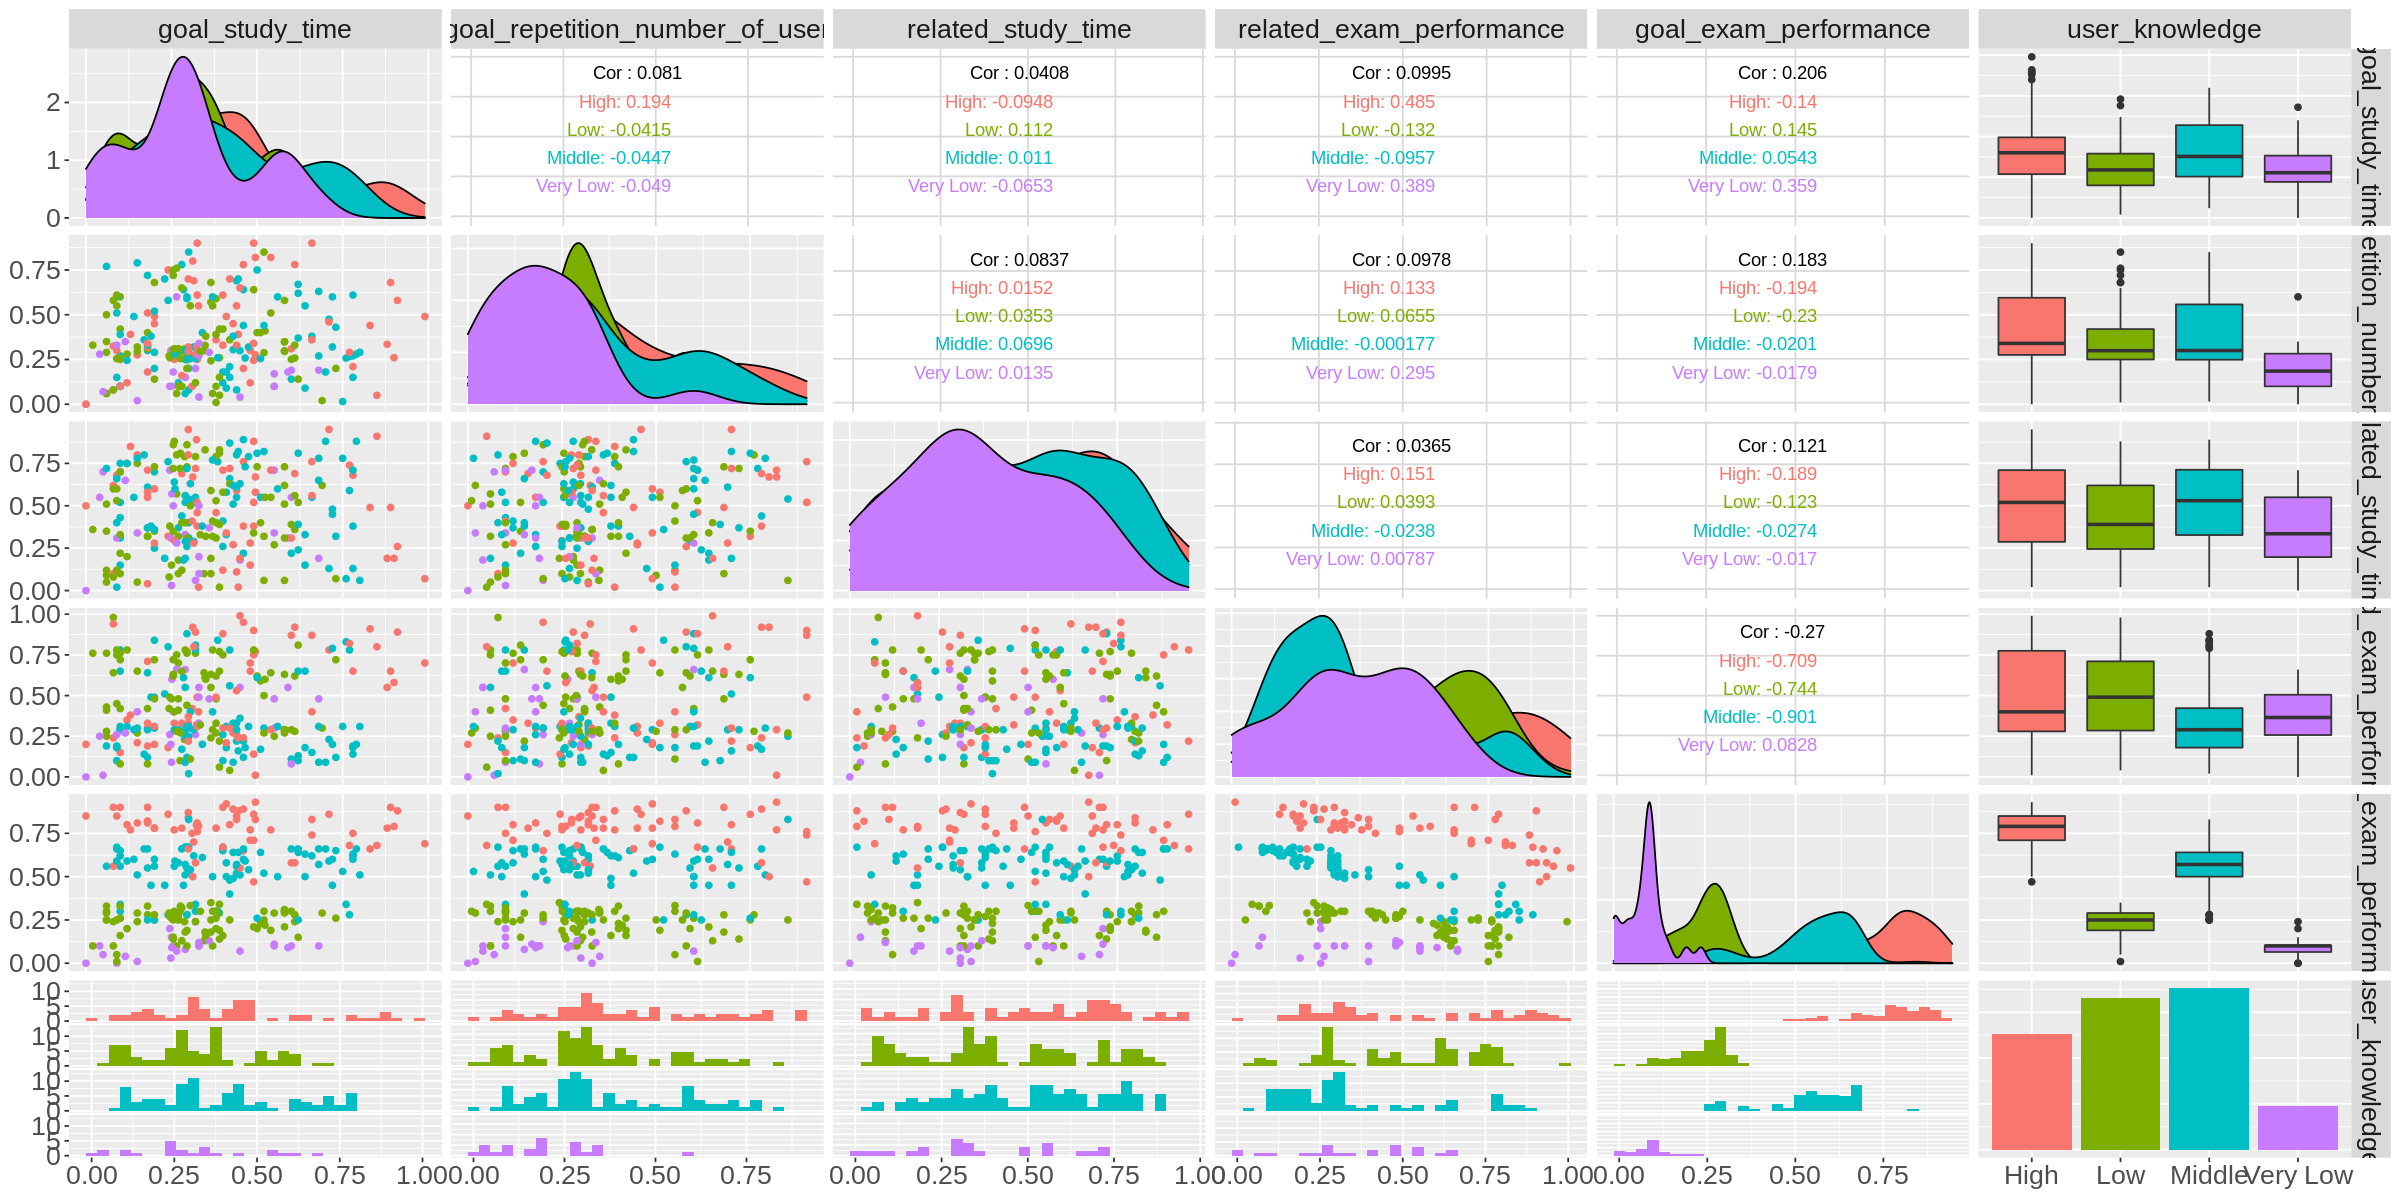

In [7]:
options(repr.plot.width = 20, repr.plot.height = 10)
knowledge_ggpairs <- training_data_tidy %>%
ggpairs(aes(color = user_knowledge)) + 
   theme(text = element_text(size = 20)) 

knowledge_ggpairs

*Figure 1: Plot of relationships between all predictors*

**Only the scattered plot showing relationship between exam performance of goal and related materials shows distincly distributed classes, the classes in all other plots except this one are all kind of mixed up and difficult to distinguish. Therefore, "goal_exam_performance" and "related_exam_performance" will be the predictors we will be looking at for our project.**

**To take a closer look at how the relationship between our predictors is, we then plot a single graph with "goal_exam_performance" on the x-axis, "related_exam_performance" on the y-axis, and finally, "user_knowledge" as the target variable, which are colored by class.**

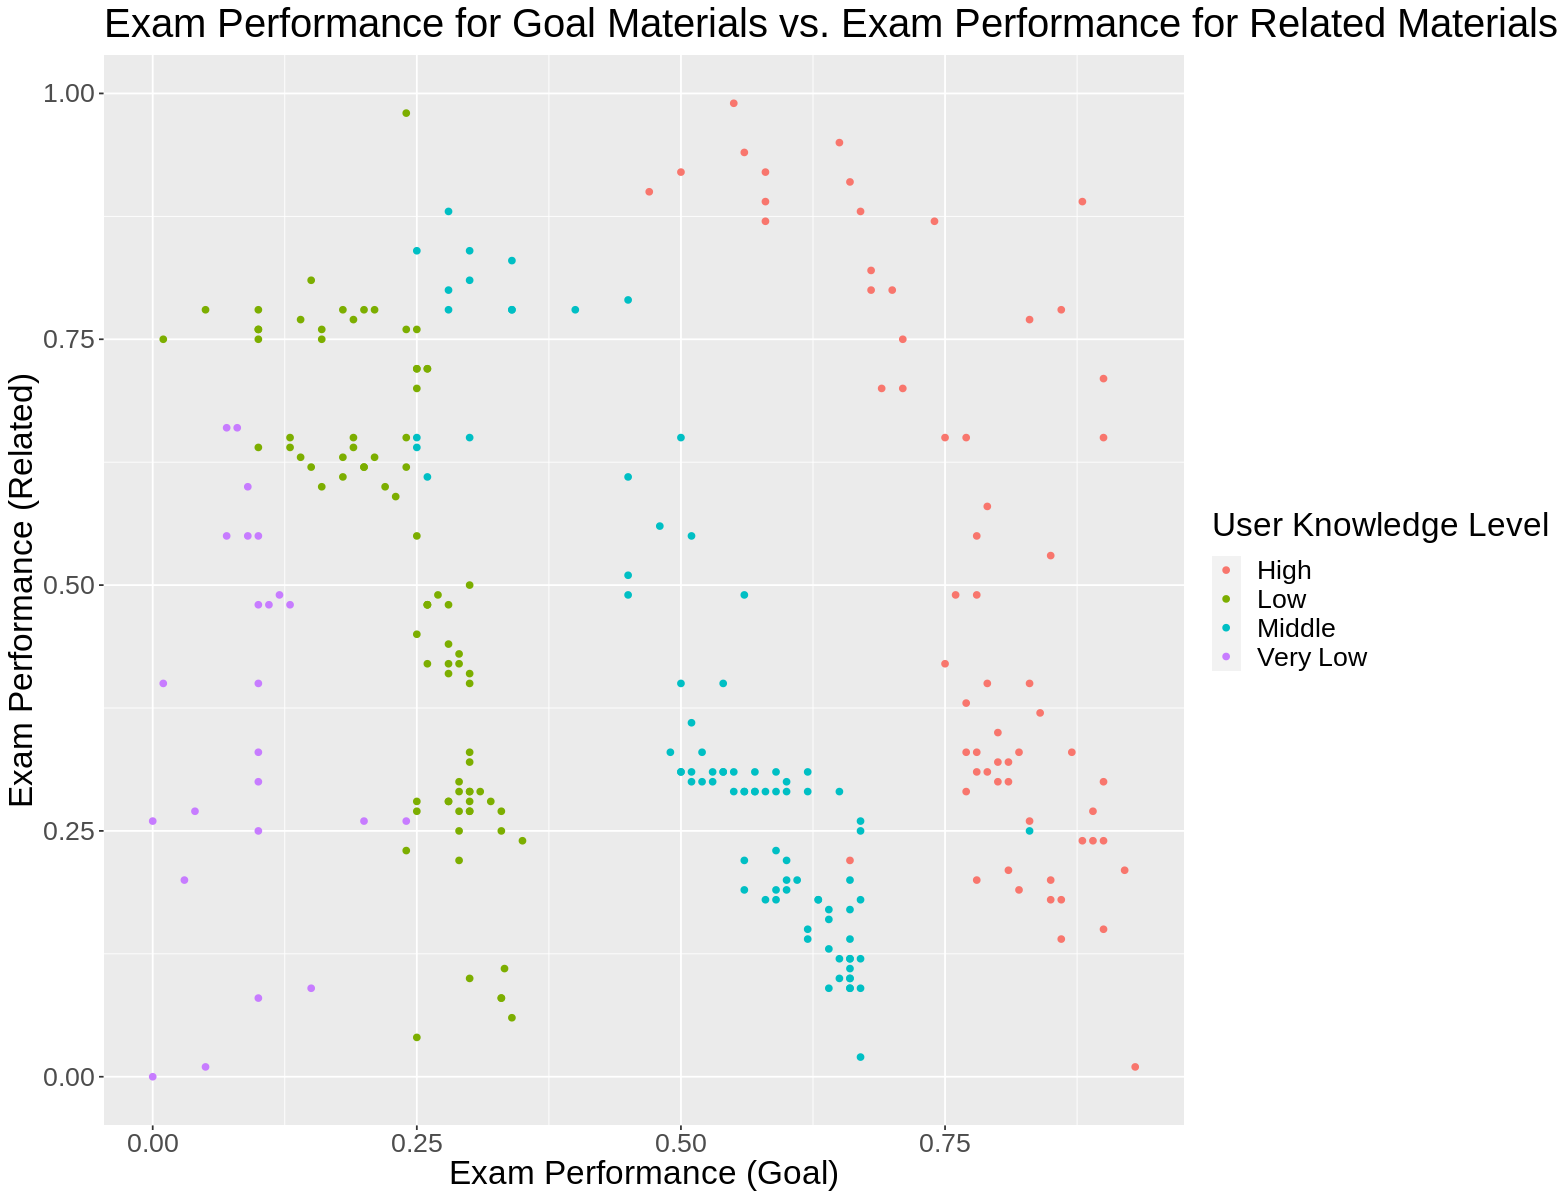

In [14]:
#Check if there is relationship between both types of exam performance and user knowledge

options(repr.plot.width = 13, repr.plot.height = 10)

plot <- ggplot(training_data_tidy, aes(x = goal_exam_performance, y = related_exam_performance, color = user_knowledge)) + 
    geom_point() +
    labs(x = "Exam Performance (Goal)", y = "Exam Performance (Related)", color = "User Knowledge Level") +
    theme(text = element_text(size = 20)) + 
    ggtitle("Exam Performance for Goal Materials vs. Exam Performance for Related Materials") 

plot

*Figure 2: Enlarged plot of relationship between our chosen predictors*

**From the plot above we can see that at where both types of exam performance are low, the user knowledge level are generally very low (purple dots), and the high user knowledge generally exists at area where both types of exam performance are high. In conclusion, this illustrates that there is a relationship between both types of exam performance and the level of user knowledge as well as both types of exam performance would be good predictors to predict the level of user knowledge.**

**Now, we must find the best K-value for our KNN-classification model. In the recipe we must standardize our data and also cross-valdiate. We preform a 5-fold cross validation with K values between 1 and 15. By collecting our metrics in the knn_results dataframe, we can then plot our accuracies and judge the best K-value with help from our accuracy_plot.**

! Fold3: internal: No observations were detected in `truth` for level(s): 'Very L...



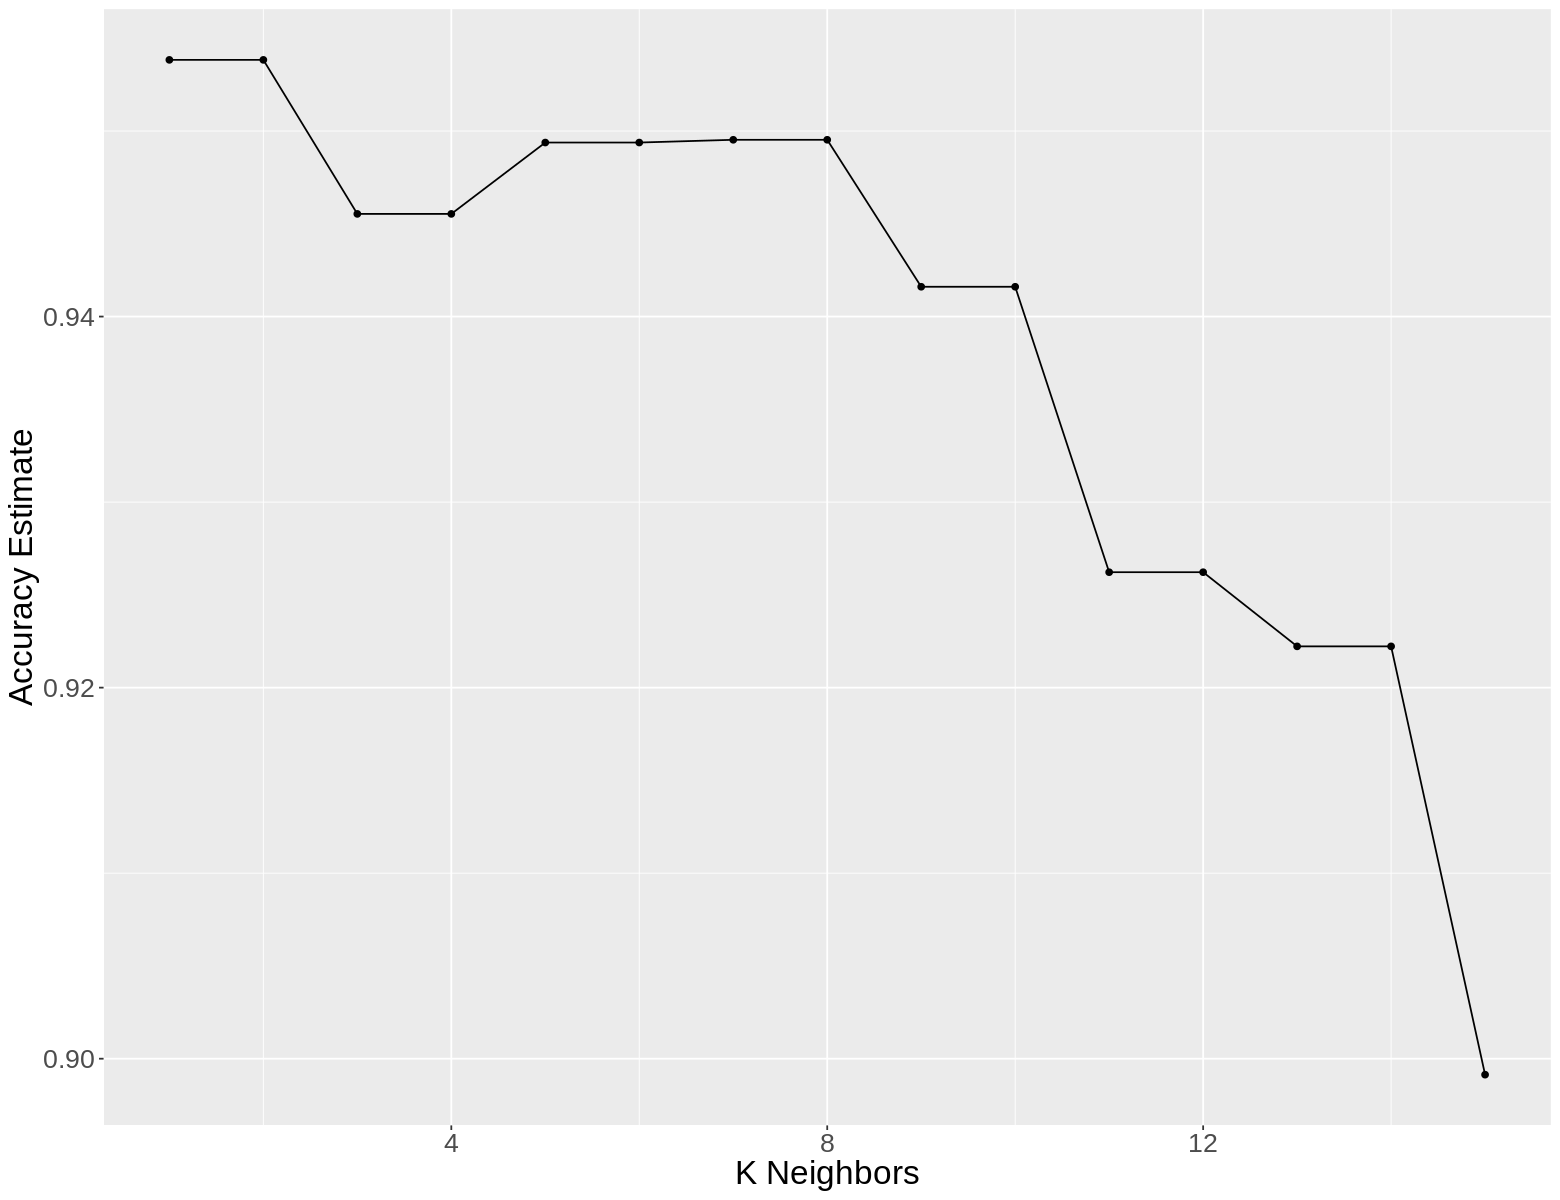

In [9]:
#Find the K-value that gives the highest accuracy using corss-validation

set.seed(1)

knowledge_recipe <- recipe(user_knowledge ~ goal_exam_performance + related_exam_performance, data = training_data_tidy) %>%
step_scale(all_predictors()) %>%
step_center(all_predictors())
                                            
knowledge_vfold <- vfold_cv(training_data_tidy, v = 5, strata = user_knowledge)
                                       
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbor = tune()) %>%
set_engine("kknn") %>%
set_mode("classification")
                  
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by = 1)) 

knn_results <- workflow() %>%
add_recipe(knowledge_recipe) %>%
add_model(knn_tune) %>%
tune_grid(resamples = knowledge_vfold, grid = k_vals) %>%
collect_metrics()
          
accuracies <- knn_results %>%
filter(.metric == "accuracy")
    
accuracy_plot <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
geom_point() +
geom_line() +
labs(x = "K Neighbors", y = "Accuracy Estimate")+
theme(text = element_text(size = 20))

accuracy_plot

*Figure 3: Plot of numbers of K neighbors from 1 to 15 versus their accuracies*

**By observing the plot above, we can conclude that the best K-value is probably 2 because it gives roughly the optimal accuracy and it isn't too costly for calculation, and changing the value to a nearby one only decreases the accuracy by around 0.01 so it's not going to have a big impact on the overall prediction.**

**Using our best K-value we build a KNN-classification model for predicting the target variable. To further ensure we have the best K-value, we test the accuracy of a prediction using the testing data and our bestk_fit dataframe.**

In [10]:
#Build model with the best K-value

bestk_spec <- nearest_neighbor(weight_func = "rectangular", neighbor = 2) %>%
set_engine("kknn") %>%
set_mode("classification")

bestk_fit <- workflow() %>%
add_recipe(knowledge_recipe) %>%
add_model(bestk_spec) %>%
fit(data = training_data_tidy)

#Finally, using testing data set to predict

bestk_predictions <- predict(bestk_fit, testing_data_tidy) %>%
bind_cols(testing_data_tidy) %>%
metrics(truth = user_knowledge, estimate = .pred_class) %>%
filter(.metric == "accuracy")

bestk_predictions

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,0.9310345


*Table 6: Accuracy of the best knn-classification model we ended up with*

**By using the *metrics* function, we find that our K-value is able to predict with an accuracy of 93%! This is a very high accuracy rate for a classification model, and it indicates that the model is very reliable as well.**

**Now, to further ensure that our model works with for data presented within the dataset, let's try to predict some made-up data using this model and see if it will work well. To do this, we make up a sample of data in called "knowledge_sample" with the same variables and range as the original data set. We want to see whether the predicted result will be corresponding to the column named "observed_knowledge_level" or not.**

In [11]:
knowledge_sample <- tibble(observed_knowledge_level = c("High", "Middle", "Low", "Very Low"), 
                      goal_exam_performance = c(0.95, 0.62, 0.37, 0.14), 
                     related_exam_performance = c(0.87, 0.50, 0.43, 0.28))

prediction <- predict(bestk_fit, knowledge_sample)

prediction_table <- bind_cols(knowledge_sample, prediction) %>%
rename(predicted_knowledge_level = .pred_class) %>%
mutate(observed_knowledge_level = as.factor(observed_knowledge_level))

prediction_table

observed_knowledge_level,goal_exam_performance,related_exam_performance,predicted_knowledge_level
<fct>,<dbl>,<dbl>,<fct>
High,0.95,0.87,High
Middle,0.62,0.50,Middle
Low,0.37,0.43,Low
Very Low,0.14,0.28,Very Low


*Table 7: Sample table used to test the model's accuracy*

**As expected, the outcome is very optimal as the model did a great job predicting our target variable.**

## Discussion

#### Summarizing what we found
After plotting the both exam performances with the user knowledge class as the colour aesthetic of the scatter plot, we saw that higher scores on both predictors were correlated with a higher user knowledge, especially the goal-oriented exam performance. We developed a knn classification model that predicted the testing data with 93% accuracy (calculated from our confusion matrix) and succesfully predicted 4 new test points in each knowledge level (high, middle, low, very low), 
so we can conclude that our model is very successful. Below shows the mean exam performances of all the observations in training_tidy data (258 total observations). Furthermore, we only had to filter out one observation as it was an outlier containing a value of 0 across all columns.

In [12]:
total_observations <- nrow(training_data_tidy)
total_observations

mean_table <- training_data_tidy %>%
    summarize(mean_goal_exam_performance = mean(goal_exam_performance), mean_related_exam_performance = mean(related_exam_performance))

mean_table

[1] 258

mean_goal_exam_performance,mean_related_exam_performance
<dbl>,<dbl>
0.4585388,0.4327132


*Table 8: Mean of each predictor*

In [13]:
total_0s_filtered <- training_data_tidy %>%
    select(goal_exam_performance, related_exam_performance) %>%
    filter(goal_exam_performance == 0, related_exam_performance == 0) %>%
    count()

total_0s_filtered 

n
<int>
1


*Table 9 : Number of outliers in our data set*

#### Is this what we expected to find?

Yes, we expected to find a relationship between exam scores and user knowledge, because exams directly test one's comprehension of the subject material, and we also expected goal-oriented exam performance should be a better predictor, 
because it was a more direct measure of one's knowledge of DC circuits. By analyzing the plot, we found the goal-oriented exam performance was a better predictor than the related subjects exam performance. 
Also, we expected our model to have an accuracy above 90%, because exploratory relationship of the predictors to our target variable, and since all we expected had been proved, all these are what we expected.

#### What impact could such findings have?

In the future, teachers can provide routine testing of goal-oriented subject material to assess their student's knowledge level of the subject; subject-related testing is also recommended, but not to the same extent. Plus, we can give students a more effective way to increase their knowledge level and help them study more targetedlyThis analysis could also prompt further questions.

#### What future questions could this lead to?

This analysis could also prompt further questions: 
1. What kind of testing techniques are more accurate at evaluating knowledge level? 
2. How can these findings be generalized to a wider series of subject topics?
3. Are there stats not included in the dataset that could improve the effectiveness of the model?
4. Do certain stats influence win rate more, and if so, is there a better weight function to use in the classification engine?

## References

### References:

H. T. Kahraman, Sagiroglu, S., Colak, I., Developing intuitive knowledge classifier and modeling of users' domain dependent data in web, Knowledge Based Systems, vol. 37, pp. 283-295, 2013.

Kahraman, H. T. (2009). Designing and Application of Web-Based Adaptive Intelligent Education System. Gazi University Ph. D. Thesis, Turkey, 1-156.